In [468]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [469]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                        AND "Period covered by return (months)" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" is NULL
                        AND "FTE Students" > 0
                        AND "Period covered by return" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


Source       URN         Region London Borough  \
0        schools  100011.0         London          Inner   
1        schools  100025.0         London          Inner   
2        schools  100032.0         London          Inner   
3        schools  100043.0         London          Inner   
4        schools  100045.0         London          Inner   
...          ...       ...            ...            ...   
13084  academies  144589.0         London          Outer   
13085  academies  144596.0         London          Outer   
13086  academies  138944.0         London          Outer   
13087  academies  138943.0         London          Outer   
13088  academies  143869.0  West Midlands        Neither   

                                             School Name  \
0                              Brookfield Primary School   
1                              Gospel Oak Primary School   
2                  Holy Trinity CofE Primary School, NW3   
3      St Mary and St Pancras Church of England Prima...   
4                   St Patrick's Catholic Primary School   
...                                                  ...   
13084                             Scargill Infant School   
13085                            Whybridge Junior School   
13086                            Upminster Junior School   
13087                            Upminster Infant School   
13088                          Hodge Hill Primary School   

                         Type Overall Phase  ...  MATPROG_19  READPROG_22  \
0            Community school       Primary  ...         1.9          NaN   
1            Community school       Primary  ...         3.0          NaN   
2      Voluntary aided school       Primary  ...         3.4          NaN   
3      Voluntary aided school       Primary  ...        -1.1          NaN   
4      Voluntary aided school       Primary  ...         5.8          NaN   
...                       ...           ...  ...         ...          ...   
13084       Academy converter       Primary  ...         NaN          NaN   
13085       Academy converter       Primary  ...         NaN          NaN   
13086       Academy converter       Primary  ...         NaN          NaN   
13087       Academy converter       Primary  ...         NaN          NaN   
13088       Academy converter       Primary  ...         NaN          NaN   

       WRITPROG_22  MATPROG_22  READPROG  WRITPROG  MATPROG  
0              NaN         NaN       1.6       1.5      0.0  
1              NaN         NaN       1.0       1.6      2.5  
2              NaN         NaN       3.0       4.5      3.4  
3              NaN         NaN      -0.2       0.5      1.2  
4              NaN         NaN      -0.2      -1.5     -1.6  
...            ...         ...       ...       ...      ...  
13084          NaN         NaN       1.9       2.5      2.0  
13085          NaN         NaN       1.9       2.5      2.0  
13086          NaN         NaN       1.9       2.5      2.0  
13087          NaN         NaN       1.9       2.5      2.0  
13088          NaN         NaN      -2.0      -1.8     -1.3  

[13089 rows x 33 columns]

In [470]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [471]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN         Region London Borough  \
0        schools  100011.0         London          Inner   
1        schools  100025.0         London          Inner   
2        schools  100032.0         London          Inner   
3        schools  100043.0         London          Inner   
4        schools  100045.0         London          Inner   
...          ...       ...            ...            ...   
13084  academies  144589.0         London          Outer   
13085  academies  144596.0         London          Outer   
13086  academies  138944.0         London          Outer   
13087  academies  138943.0         London          Outer   
13088  academies  143869.0  West Midlands        Neither   

                                             School Name  \
0                              Brookfield Primary School   
1                              Gospel Oak Primary School   
2                  Holy Trinity CofE Primary School, NW3   
3      St Mary and St Pancras Church of England Prima...   
4                   St Patrick's Catholic Primary School   
...                                                  ...   
13084                             Scargill Infant School   
13085                            Whybridge Junior School   
13086                            Upminster Junior School   
13087                            Upminster Infant School   
13088                          Hodge Hill Primary School   

                         Type Overall Phase  ...  WRITPROG_22  MATPROG_22  \
0            Community school       Primary  ...          NaN         NaN   
1            Community school       Primary  ...          NaN         NaN   
2      Voluntary aided school       Primary  ...          NaN         NaN   
3      Voluntary aided school       Primary  ...          NaN         NaN   
4      Voluntary aided school       Primary  ...          NaN         NaN   
...                       ...           ...  ...          ...         ...   
13084       Academy converter       Primary  ...          NaN         NaN   
13085       Academy converter       Primary  ...          NaN         NaN   
13086       Academy converter       Primary  ...          NaN         NaN   
13087       Academy converter       Primary  ...          NaN         NaN   
13088       Academy converter       Primary  ...          NaN         NaN   

       READPROG  WRITPROG  MATPROG  Income per Student  \
0           1.6       1.5      0.0         7910.371852   
1           1.0       1.6      2.5         8161.532256   
2           3.0       4.5      3.4         8305.849034   
3          -0.2       0.5      1.2         9308.917843   
4          -0.2      -1.5     -1.6        10599.309143   
...         ...       ...      ...                 ...   
13084       1.9       2.5      2.0         5426.294821   
13085       1.9       2.5      2.0         5276.923077   
13086       1.9       2.5      2.0         4336.111111   
13087       1.9       2.5      2.0         5044.609665   
13088      -2.0      -1.8     -1.3         5255.629139   

       Expenditure per Student  
0                  8085.312169  
1                  7942.870774  
2                  8150.334602  
3                  8751.446569  
4                 10945.233905  
...                        ...  
13084              4916.334661  
13085              4415.384615  
13086              4163.888889  
13087              4576.208178  
13088              4872.847682  

[13089 rows x 35 columns]

In [472]:
df['Source'].unique()

array(['schools', 'academies'], dtype=object)

In [473]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.9961100387874777
Min IE Ratio: 0.0
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [474]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [475]:

df['Student Buckets'].unique()

[400, 600, 200, 1000, 800, 1200, 1400, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [520]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Total Expenditure', df)
create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

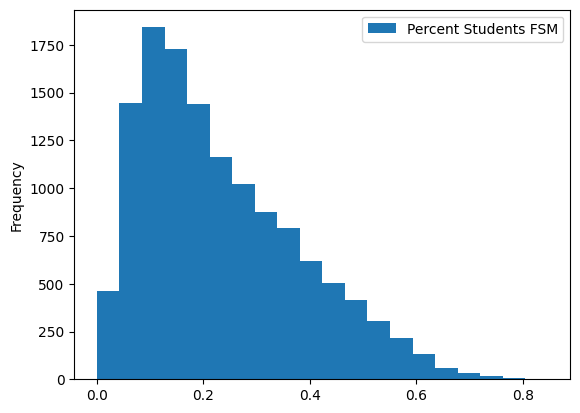

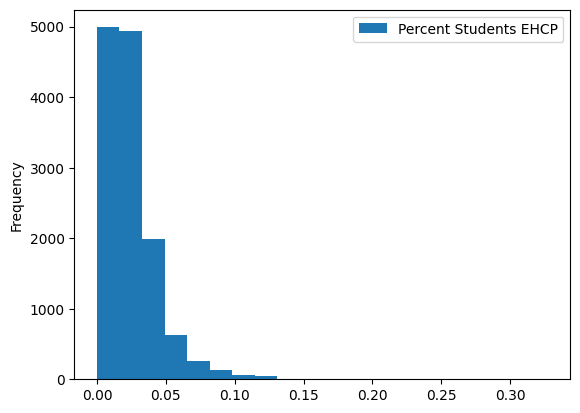

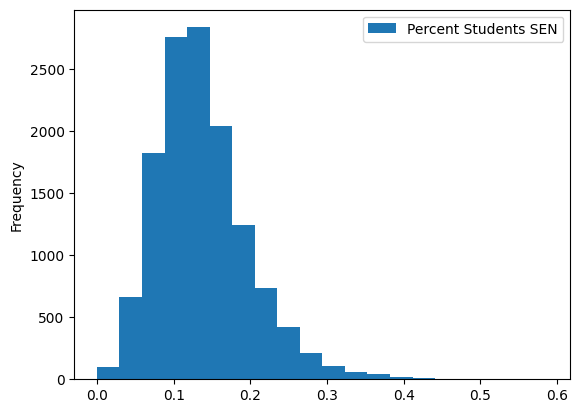

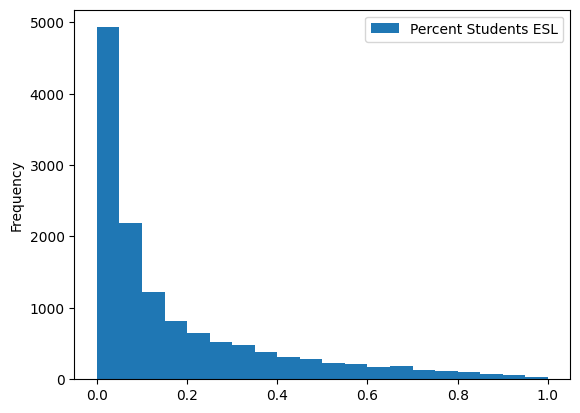

In [477]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [478]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students FSM': {df[col].corr(df['Percent Students FSM'])}" )
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students EHCP':  {df[col].corr(df['Percent Students EHCP'])}" )
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students SEN':  {df[col].corr(df['Percent Students SEN'])}" )
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students ESL':  {df[col].corr(df['Percent Students ESL'])}" )    

Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.03437955537710684
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.06507517419967267
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.02736588651341365
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  0.023964106712495558


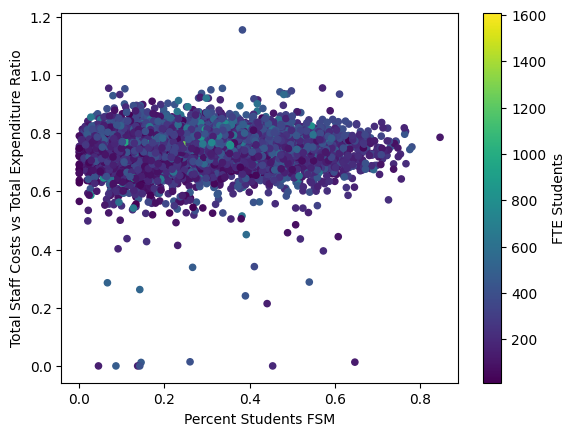

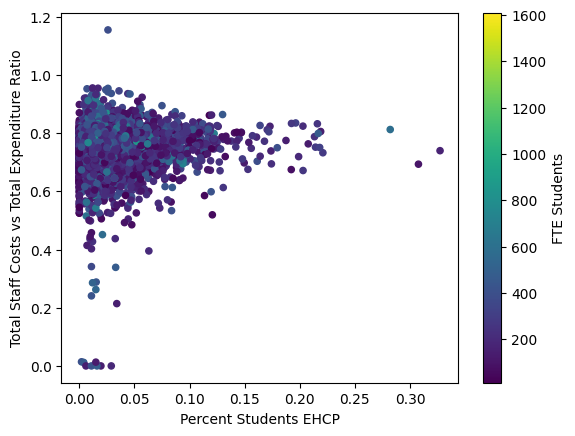

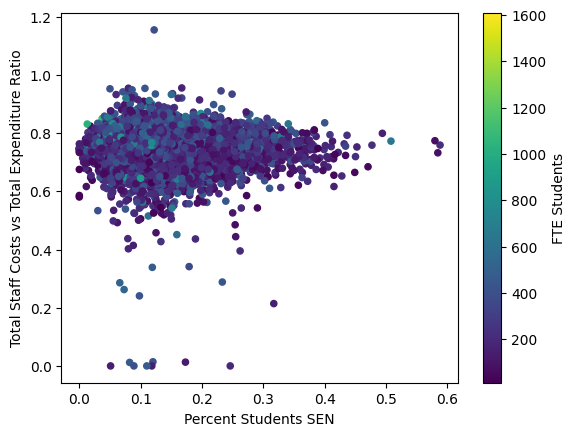

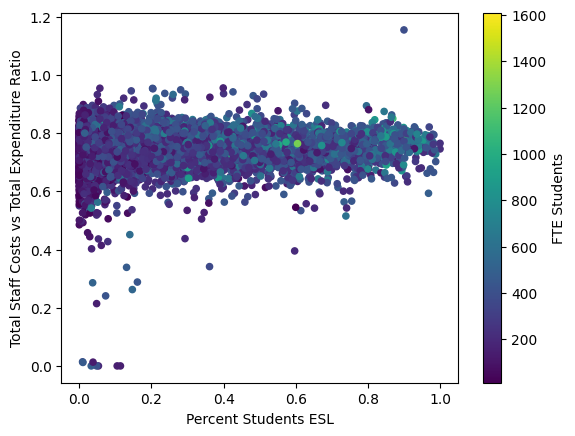

In [479]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')


Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students FSM': -0.22226620508933267
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.14818835033297278
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.13865776843062227
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.10816822410610757
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students FSM': -0.22226620508933267
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.14818835033297278
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students SEN':  -0.13865776843062227
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students ESL':  -0.10816822410610757


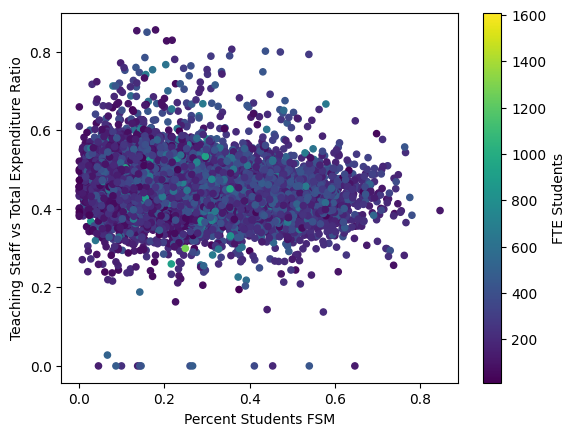

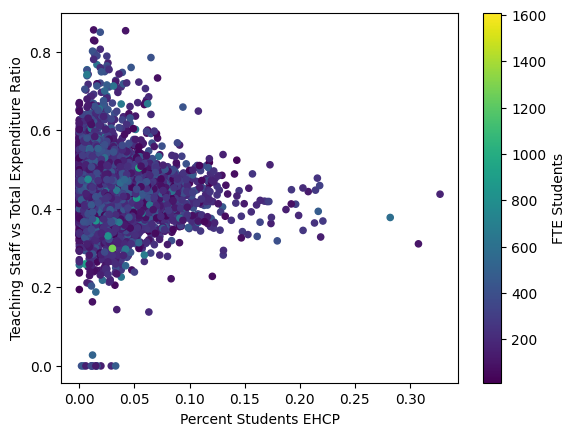

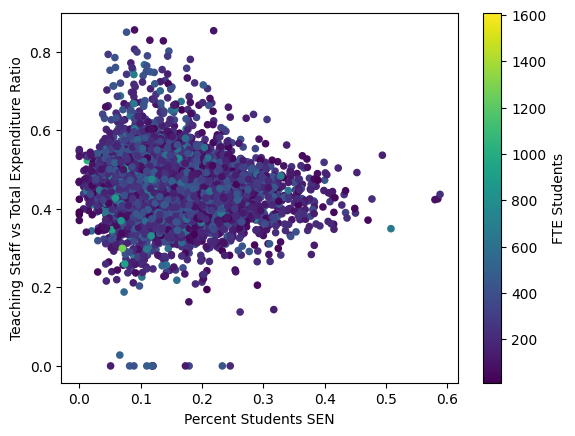

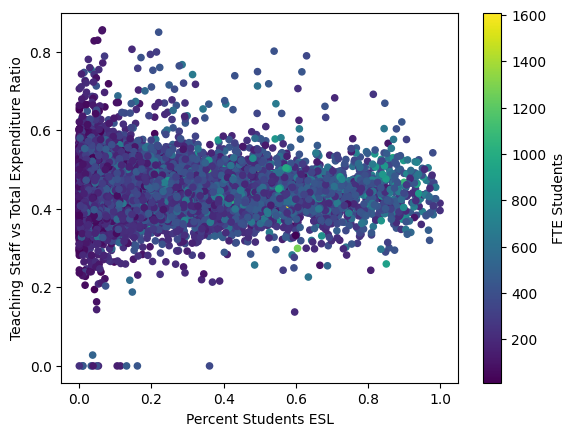

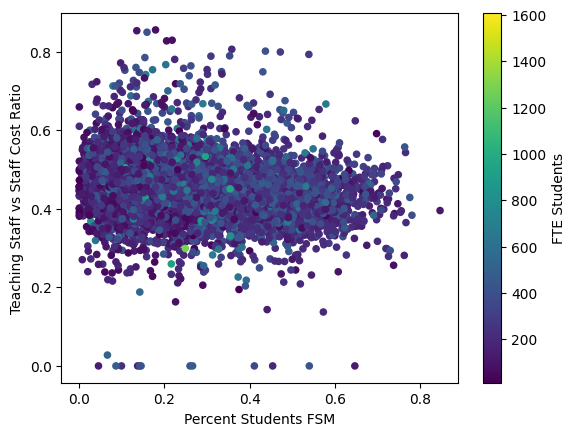

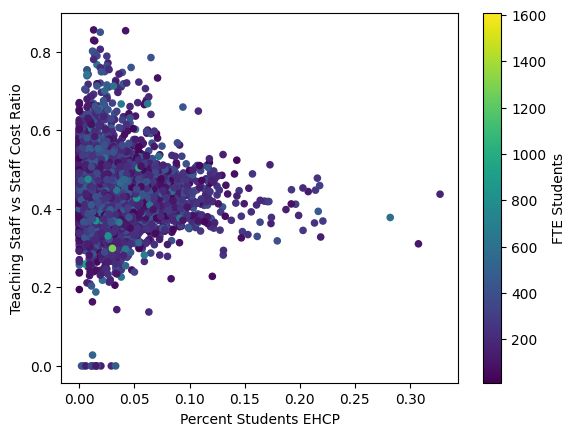

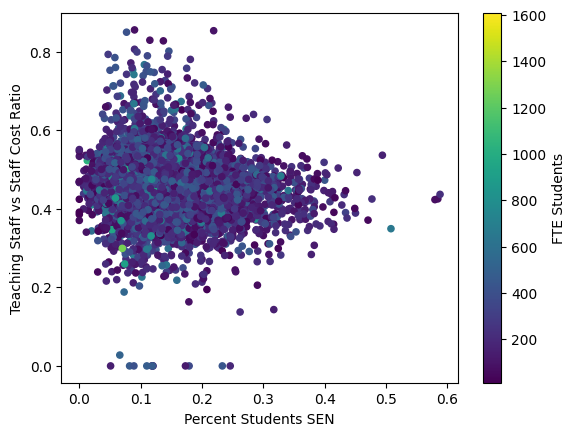

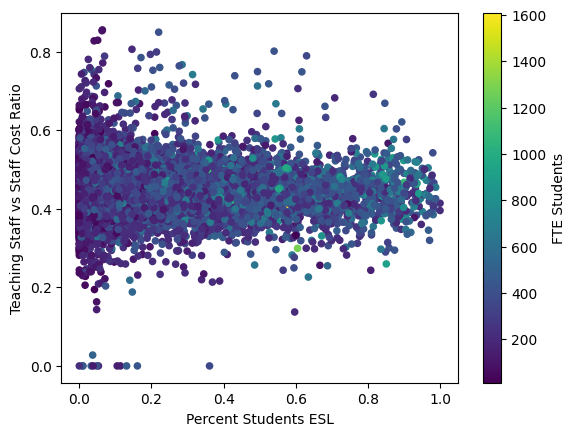

In [480]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')

Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students FSM': 0.18648962386210272
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.2543474354239063
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students SEN':  0.10946735407476406
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students ESL':  0.09392523456934623
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students FSM': 0.18648962386210272
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students EHCP':  0.2543474354239063
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students SEN':  0.10946735407476406
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students ESL':  0.09392523456934623


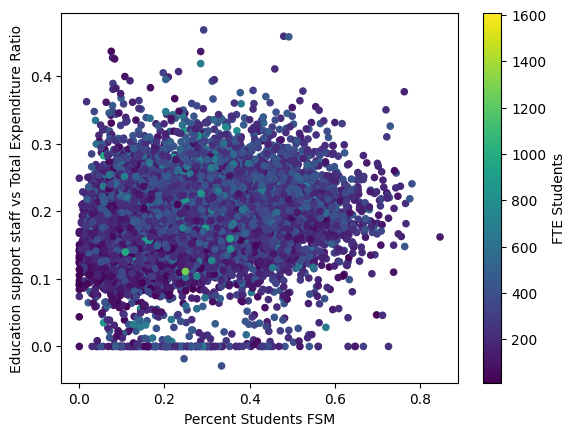

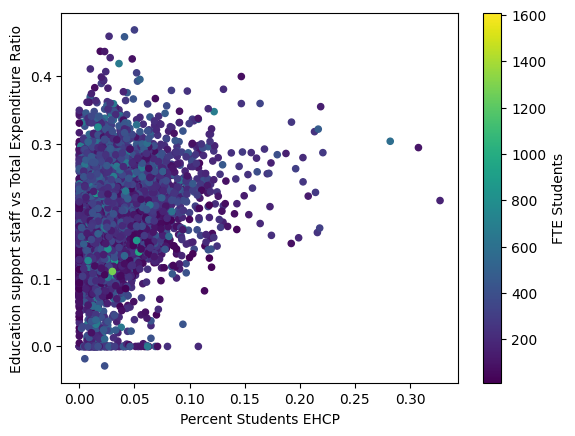

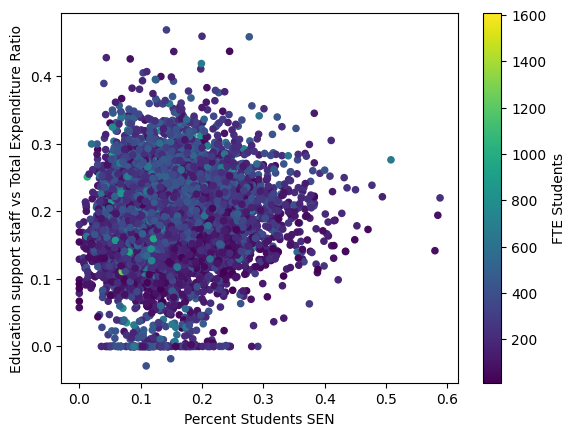

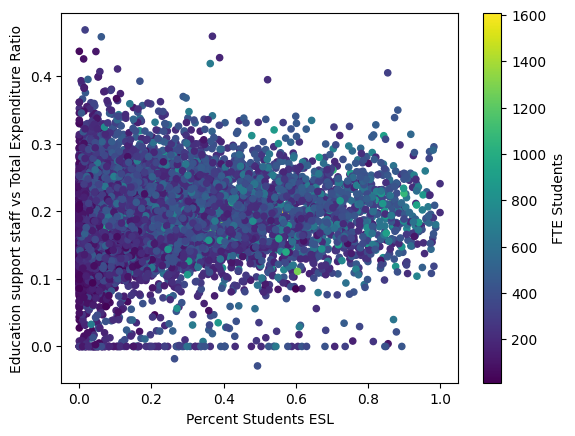

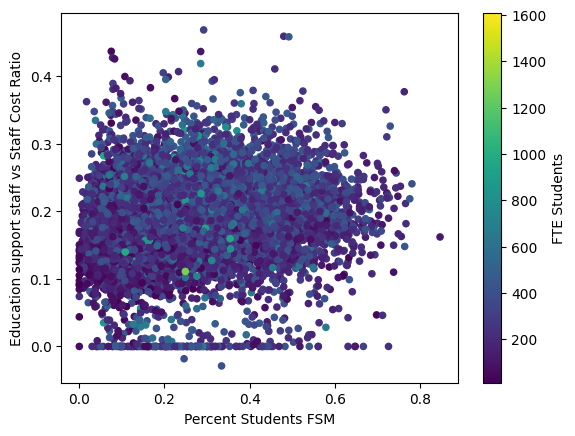

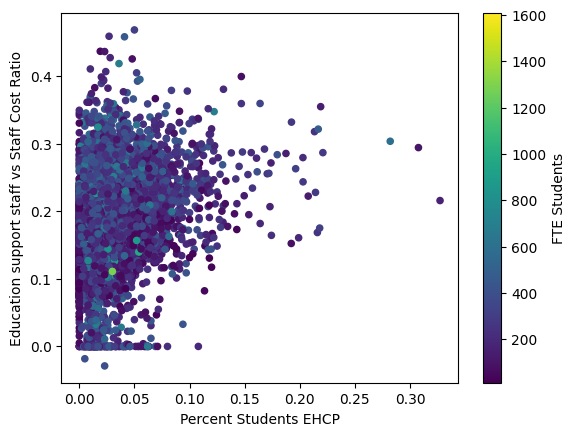

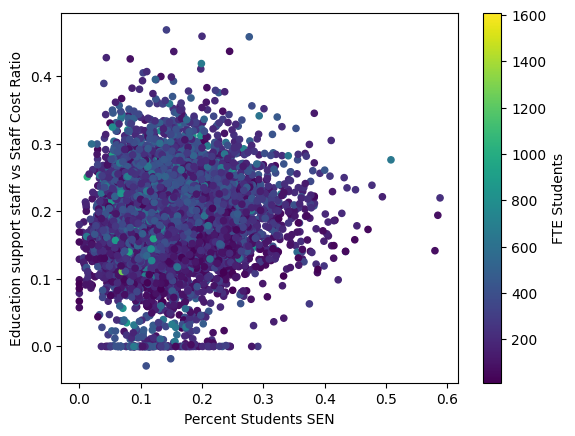

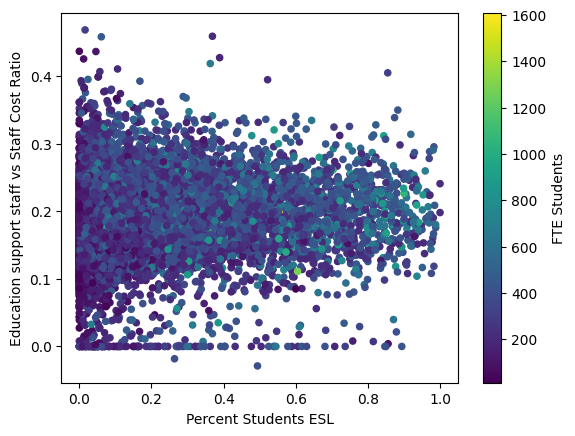

In [481]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')

Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.05293672928626498
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.04462418275485846
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.034442189152974645


Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.0419658857713008
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students FSM': -0.05293672928626498
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.04462418275485846
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students SEN':  -0.034442189152974645
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students ESL':  -0.0419658857713008


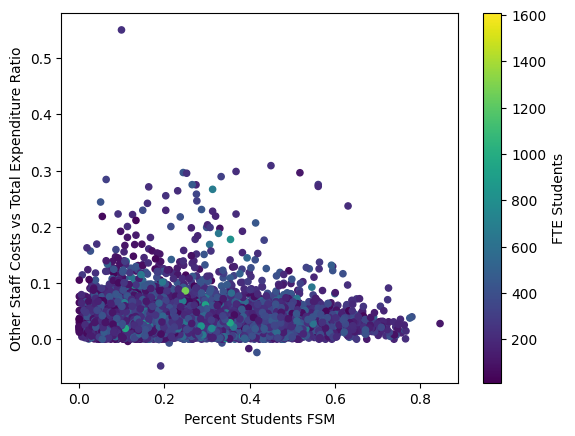

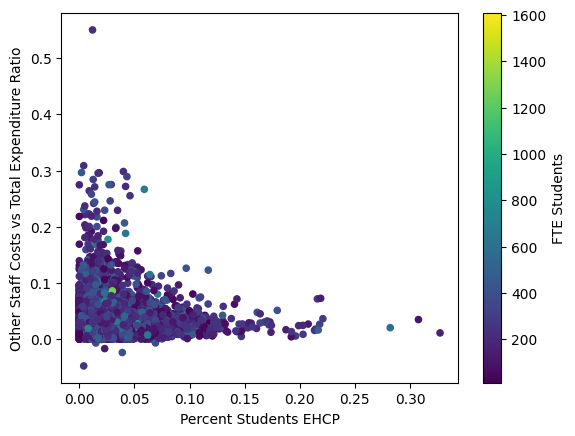

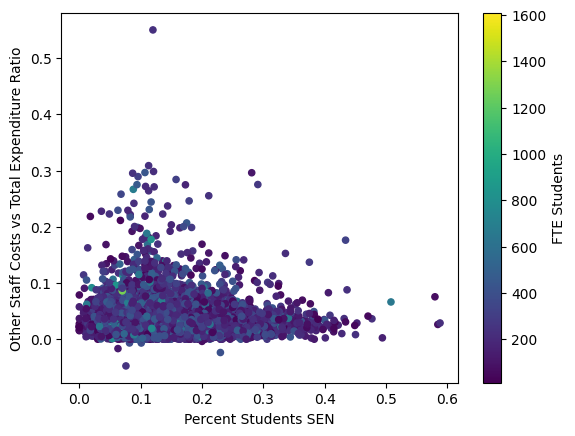

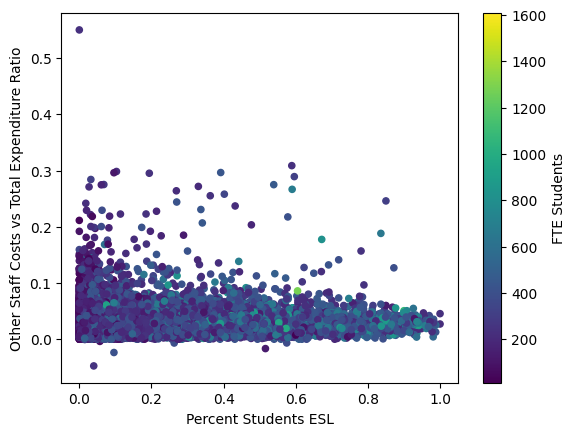

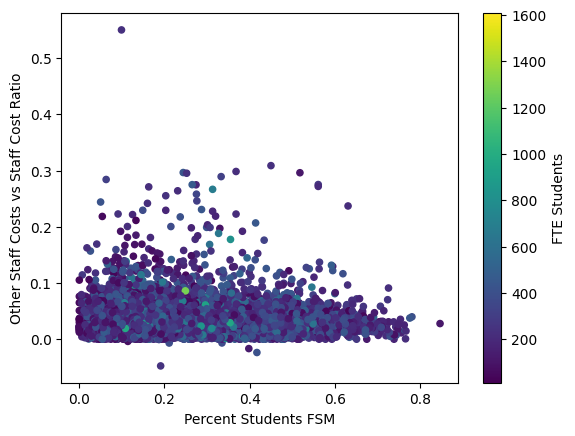

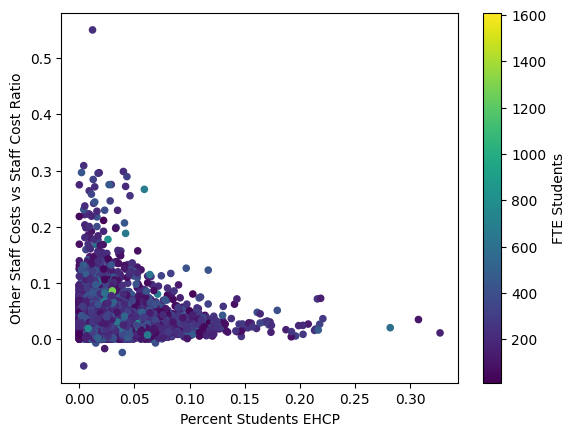

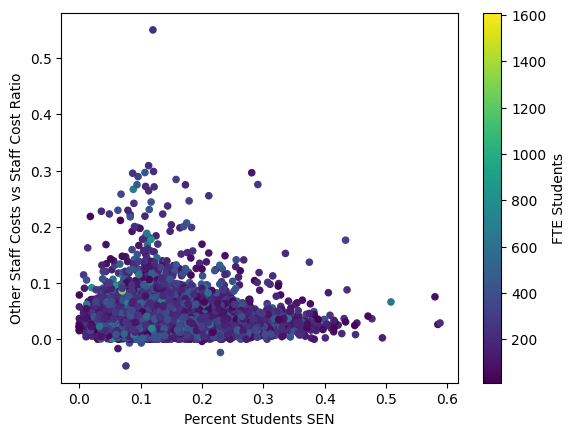

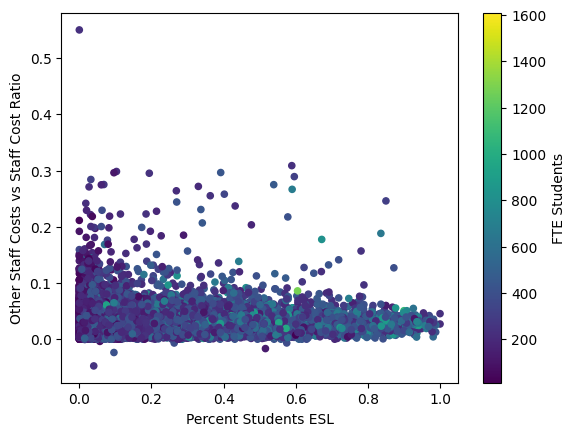

In [482]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')

Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students FSM': -0.14349407541030304
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.07894106047507471
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.05048261888812491
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.18729242809906152


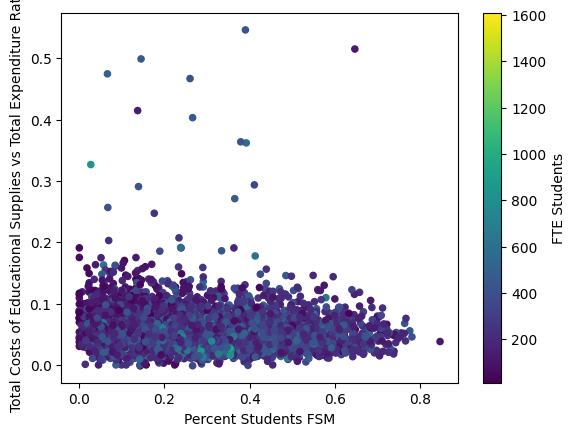

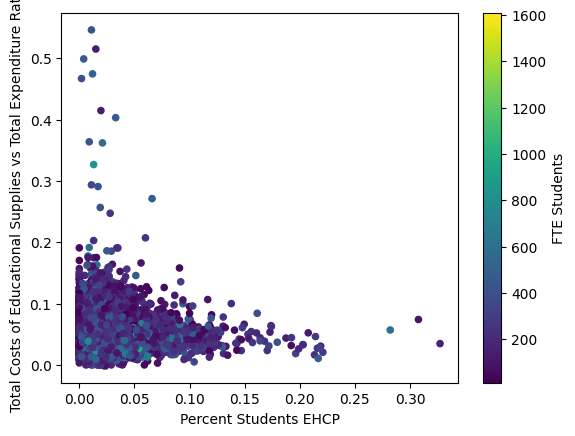

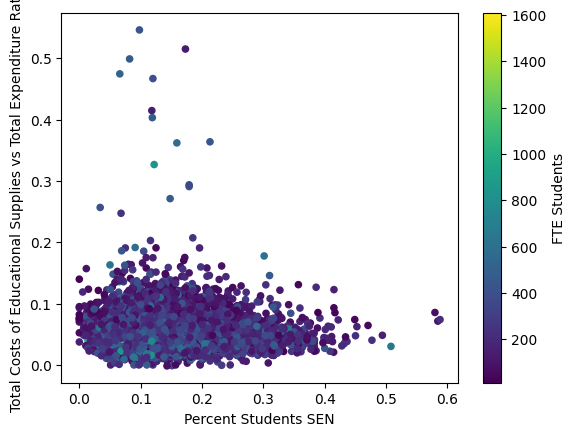

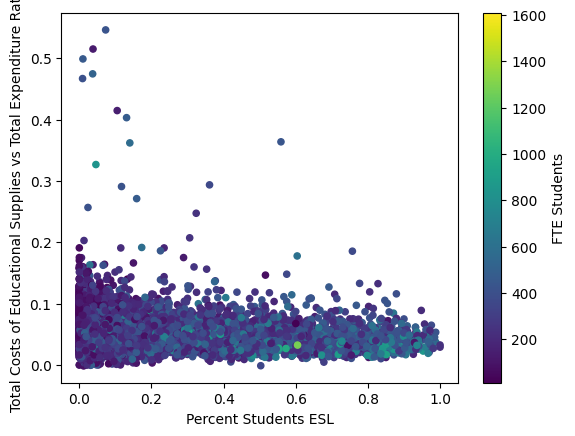

In [483]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

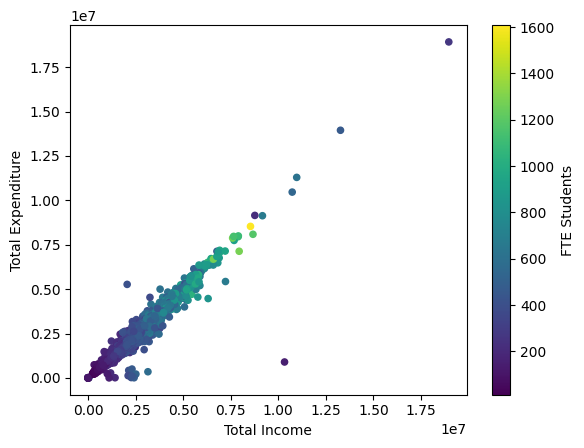

In [484]:
df.plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [485]:
df['Total Expenditure'].corr(df['Total Income'])

0.9858743561469054

In [486]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                                        School Name  \
0      100011.0                          Brookfield Primary School   
1      100025.0                          Gospel Oak Primary School   
2      100032.0              Holy Trinity CofE Primary School, NW3   
3      100043.0  St Mary and St Pancras Church of England Prima...   
4      100045.0               St Patrick's Catholic Primary School   
...         ...                                                ...   
13084  144589.0                             Scargill Infant School   
13085  144596.0                            Whybridge Junior School   
13086  138944.0                            Upminster Junior School   
13087  138943.0                            Upminster Infant School   
13088  143869.0                          Hodge Hill Primary School   

       Classroom Staff  Total Staff Costs  Other Staff Costs  
0           1976365.33         2267889.94          148711.36  
1           2313998.98         2736888.50          270755.55  
2            883165.29         1021366.68           69445.93  
3           1081672.81         1242085.87           70507.37  
4           1045520.48         1209301.94           49683.01  
...                ...                ...                ...  
13084        787000.00          903000.00           53000.00  
13085        935000.00         1076000.00           57000.00  
13086       1029000.00         1179000.00           77000.00  
13087        817000.00          935000.00           59000.00  
13088       2597000.00         2823000.00           71000.00  

[13089 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

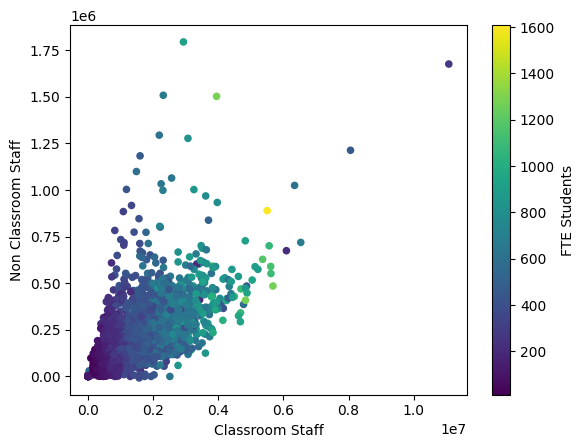

In [487]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

In [488]:
df['Non Classroom Staff'].corr(df['Total Expenditure'])

0.7873087368738947

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

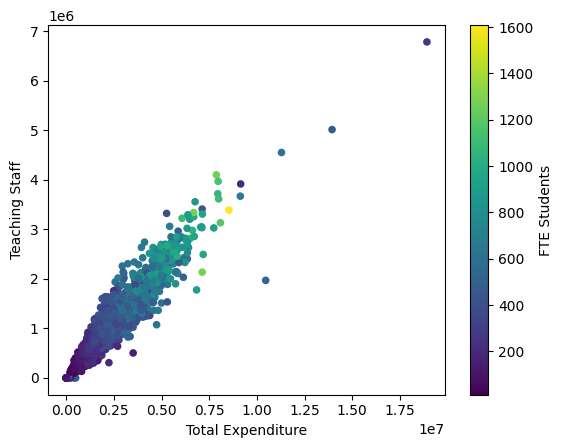

In [489]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [490]:
df['Teaching Staff'].corr(df['Total Expenditure'])

0.9655119728219121

In [491]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.46   0.46  0.14  0.86   
400                                                  0.45   0.45  0.14  0.81   
600                                                  0.46   0.46  0.03  0.85   
800                                                  0.46   0.46  0.23  0.77   
1000                                                 0.46   0.46  0.26  0.58   
1200                                                 0.46   0.45  0.39  0.53   
1400                                                 0.44   0.50  0.30  0.52   
1600                                                 0.40   0.40  0.40  0.40   

                             
                  std   var  
Student Buckets              
200              0.06  0.00  
400              0.06  0.00  
600              0.06  0.00  
800              0.06  0.00  
1000             0.06  0.00  
1200             0.04  0.00  
1400             0.12  0.01  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

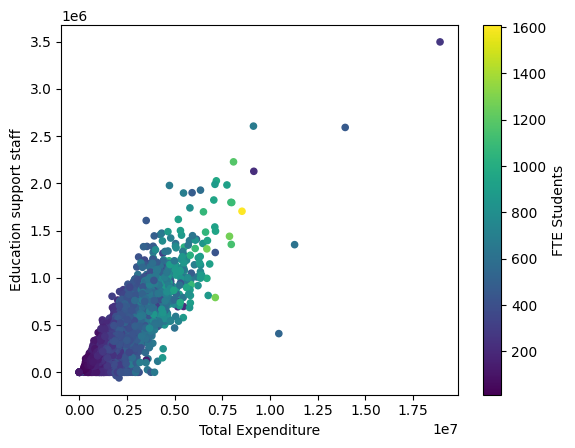

In [492]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [493]:
df['Education support staff'].corr(df['Total Expenditure'])

0.8885664017013883

In [494]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.22   0.22   
1400                                                          0.16   0.18   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.00  0.44  0.05  0.0  
400              0.00  0.47  0.05  0.0  
600              0.00  0.46  0.05  0.0  
800              0.01  0.42  0.05  0.0  
1000             0.04  0.32  0.06  0.0  
1200             0.16  0.28  0.04  0.0  
1400             0.11  0.20  0.05  0.0  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

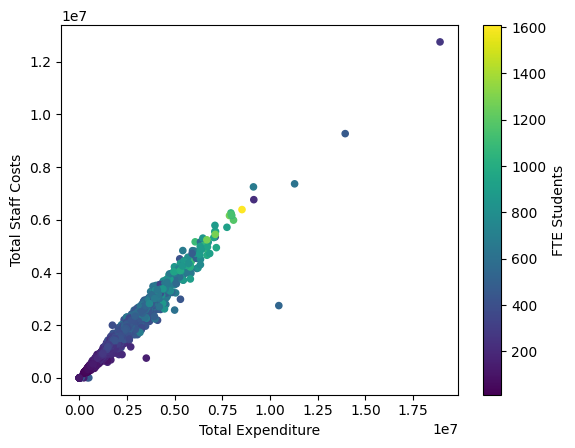

In [495]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [496]:
df['Total Staff Costs'].corr(df['Total Expenditure'])

0.9896638480986727

In [497]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.74   0.75  0.01   
400                                                     0.75   0.76  0.34   
600                                                     0.76   0.77  0.01   
800                                                     0.77   0.77  0.52   
1000                                                    0.76   0.76  0.59   
1200                                                    0.78   0.77  0.72   
1400                                                    0.78   0.78  0.76   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.96  0.05  0.0  
400              1.15  0.05  0.0  
600              0.95  0.05  0.0  
800              0.92  0.05  0.0  
1000             0.87  0.05  0.0  
1200             0.85  0.04  0.0  
1400             0.78  0.01  0.0  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

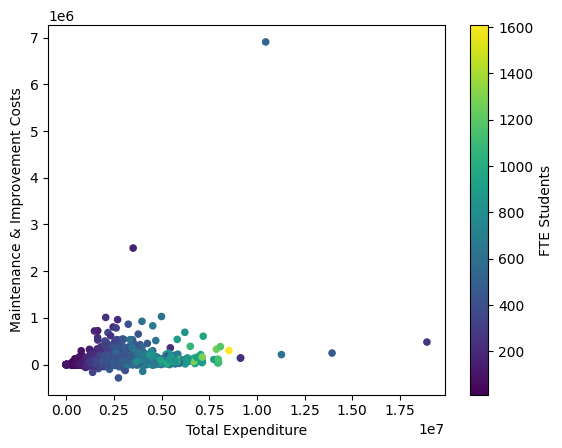

In [498]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [499]:
df['Maintenance & Improvement Costs'].corr(df['Total Expenditure'])

0.29975395599054344

In [500]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.02           
1400                                                          0.02           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.71  0.03  0.0  
400               0.02  0.00  0.49  0.02  0.0  
600               0.02  0.00  0.66  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.06  0.02  0.0  
1400              0.02  0.01  0.04  0.02  0.0  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

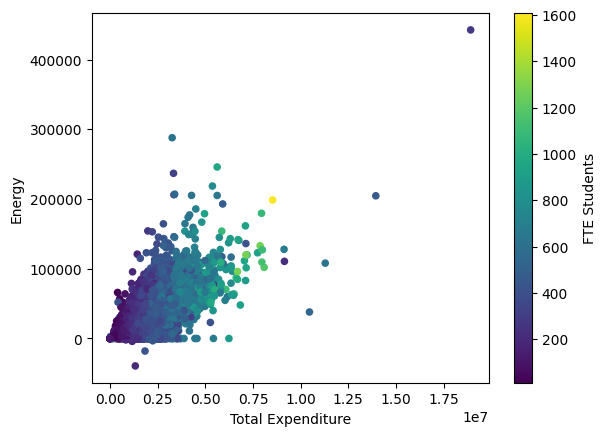

In [501]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [502]:
df['Energy'].corr(df['Total Expenditure'])

0.7100673286421343

In [503]:
df['Energy'].corr(df['FTE Students'])

0.6099088241401474

In [504]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.16  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.12  0.01   
800                                          0.02   0.02  0.00  0.09  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.01  0.01  0.03  0.01   
1400                                         0.02   0.02  0.01  0.02  0.00   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             0.0  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

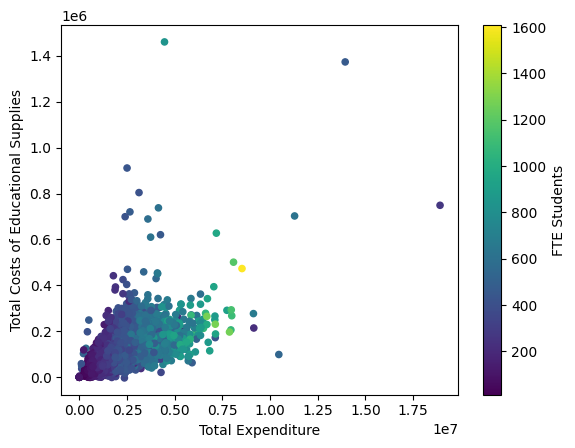

In [505]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [506]:
df['Total Costs of Educational Supplies'].corr(df['Total Expenditure'])

0.6913153403155393

In [507]:
df['Total Costs of Educational Supplies'].corr(df['FTE Students'])

0.6476949098600313

In [508]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.04               
1000                                                          0.04               
1200                                                          0.04               
1400                                                          0.03               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.52  0.02  0.0  
400               0.05  0.00  0.29  0.02  0.0  
600               0.05  0.01  0.55  0.03  0.0  
800               0.04  0.01  0.18  0.02  0.0  
1000              0.04  0.02  0.33  0.04  0.0  
1200              0.03  0.03  0.06  0.01  0.0  
1400              0.03  0.03  0.04  0.01  0.0  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

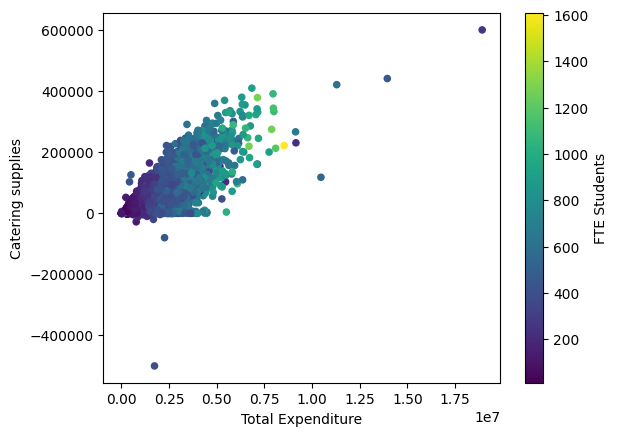

In [509]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [510]:
df['Catering supplies'].corr(df['Total Expenditure'])

0.7780280621745199

In [511]:
df['Catering supplies'].corr(df['FTE Students'])

0.7077884646911509

In [512]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.00   
1200                                                    0.03   0.04  0.00   
1400                                                    0.04   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.60  0.02  0.0  
400              0.11  0.01  0.0  
600              0.25  0.02  0.0  
800              0.08  0.01  0.0  
1000             0.07  0.01  0.0  
1200             0.05  0.02  0.0  
1400             0.05  0.01  0.0  
1600             0.03   NaN  NaN

In [513]:
df[['READPROG', 'WRITPROG', 'MATPROG']].isna().sum()

READPROG    0
WRITPROG    0
MATPROG     0
dtype: int64

In [514]:
# Start working with progress
df['Progress'] = (df['READPROG'] + df['WRITPROG'] + df['MATPROG']) / 3

<Axes: >

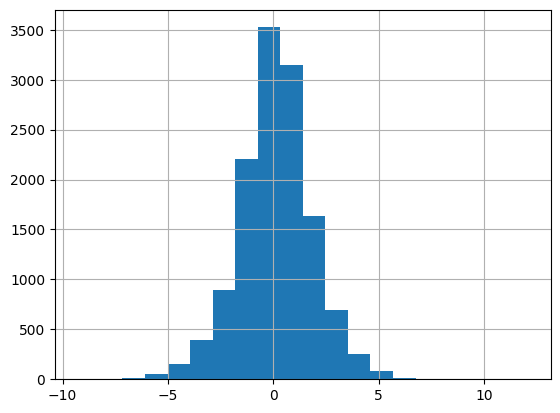

In [516]:
df['Progress'].hist(bins=20)

Correlation 'Progress' to 'Percent Students FSM': -0.11240206372313011
Correlation 'Progress' to 'Percent Students EHCP':  -0.07107492207721185
Correlation 'Progress' to 'Percent Students SEN':  -0.12263417620808292
Correlation 'Progress' to 'Percent Students ESL':  0.16270026597469422


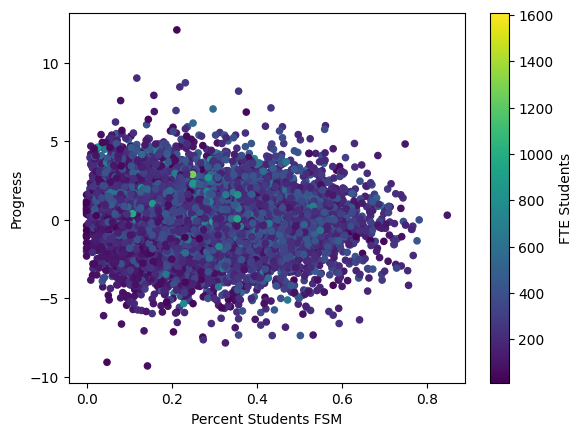

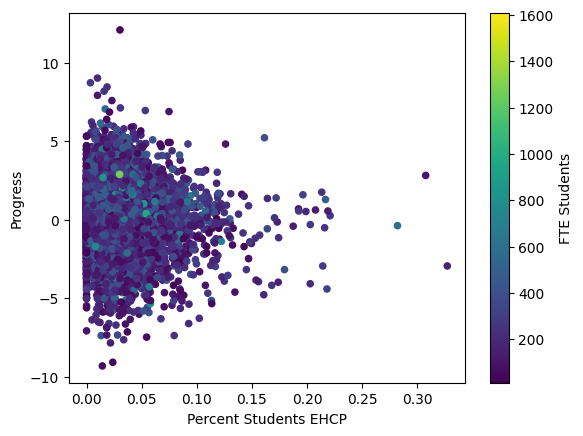

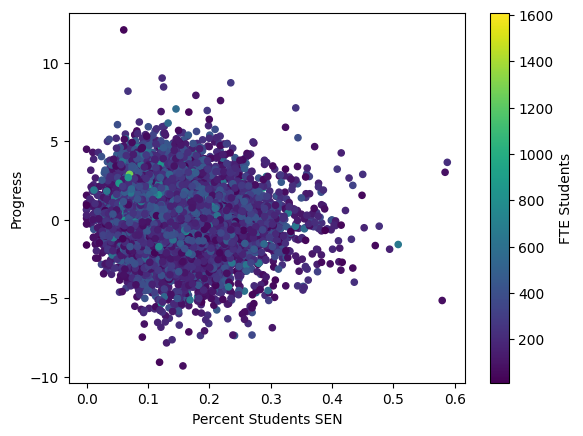

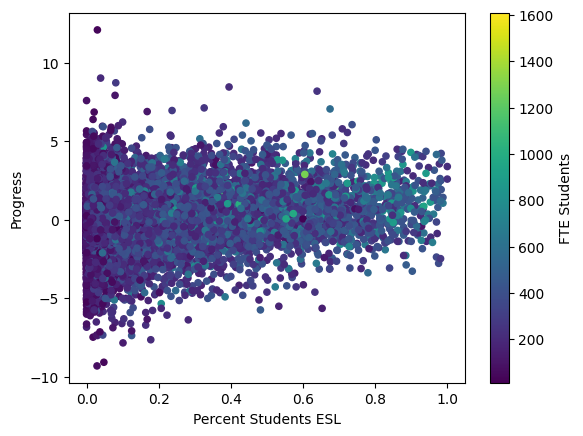

In [518]:
plot_student_groups('Progress')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

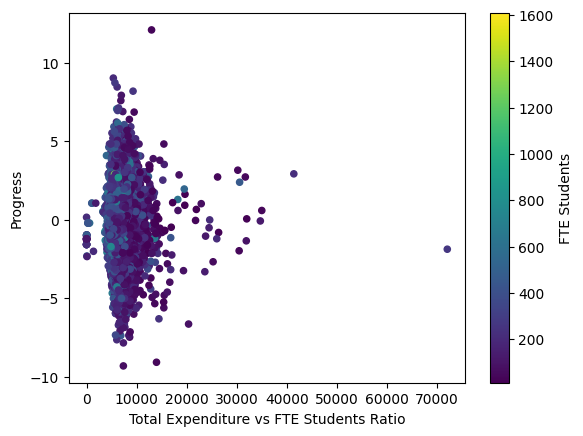

In [521]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='IE Ratio', ylabel='Progress'>

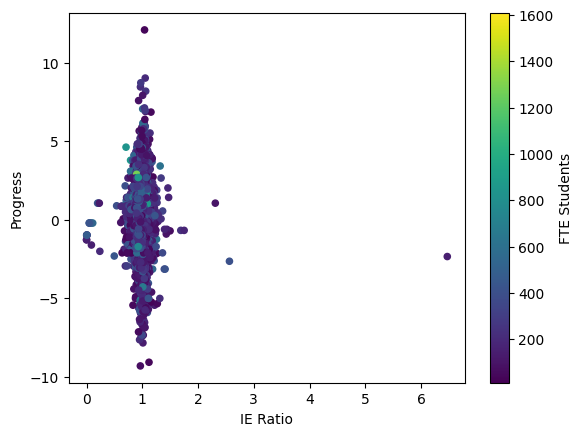

In [523]:
df.plot.scatter(x='IE Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

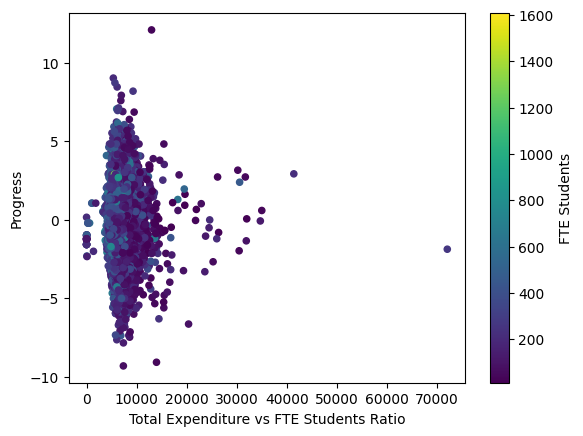

In [530]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='Other Staff Costs vs FTE Students Ratio', ylabel='Progress'>

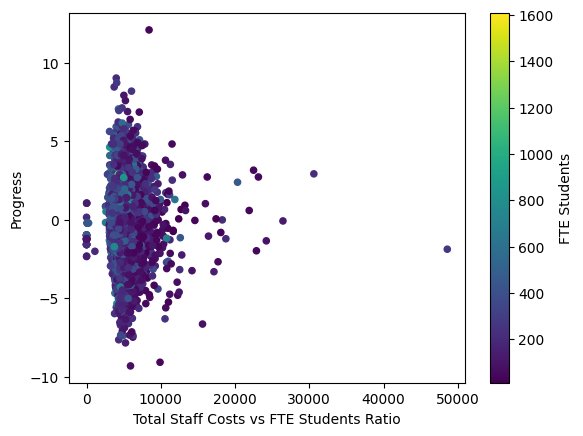

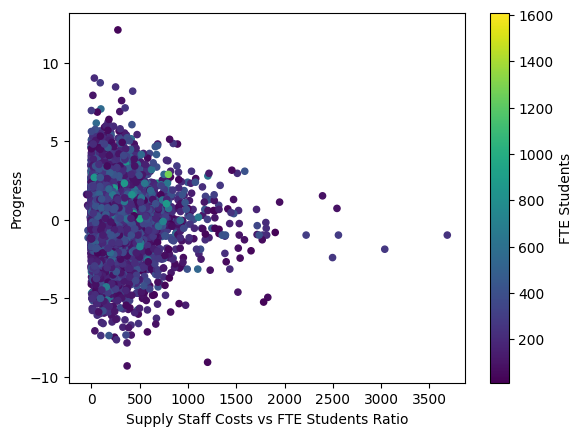

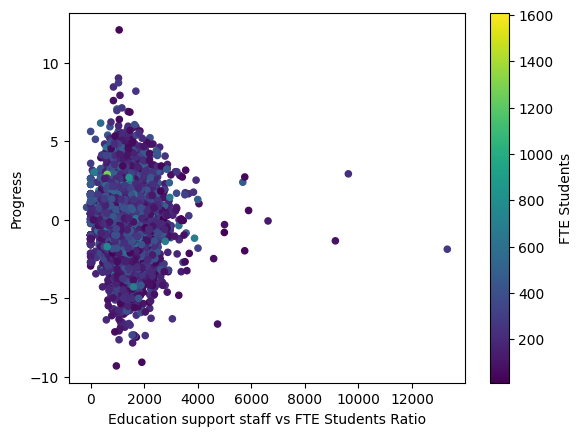

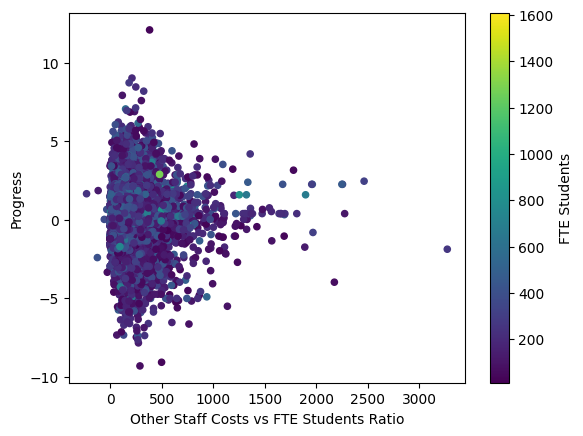

In [524]:
df.plot.scatter(x='Total Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Supply Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Education support staff vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Other Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')


<Axes: xlabel='Catering supplies', ylabel='Progress'>

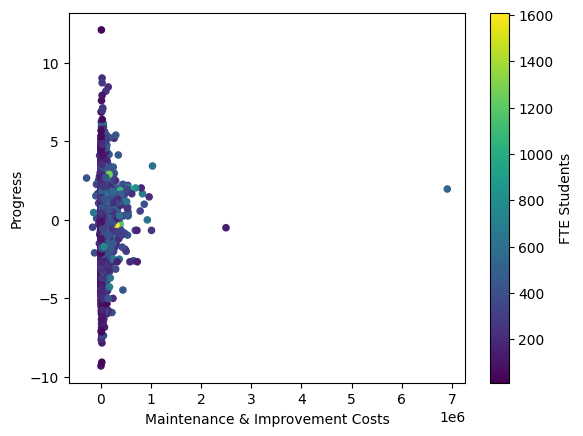

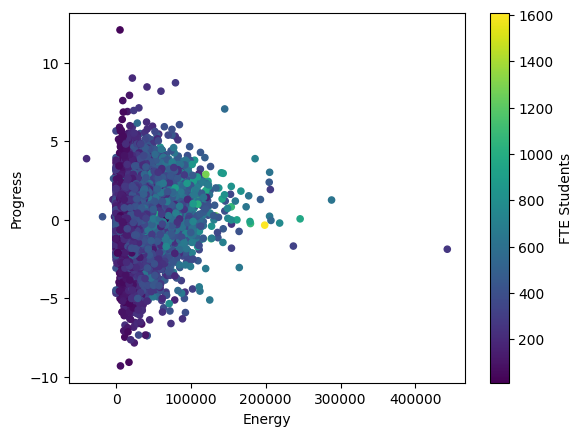

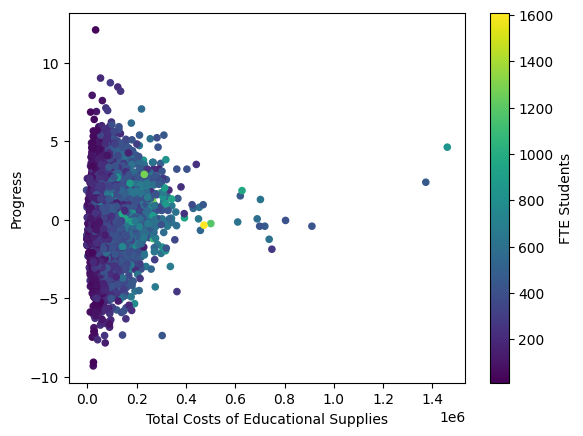

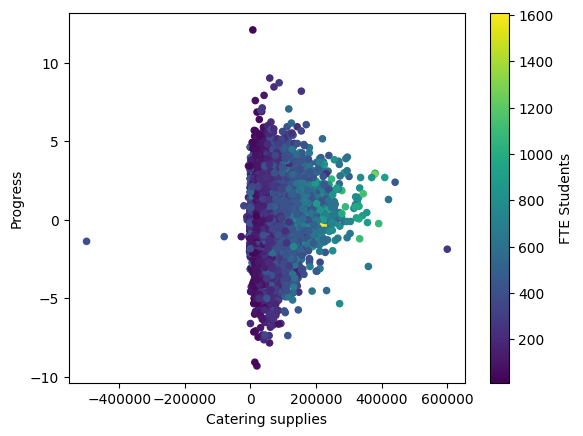

In [528]:

df.plot.scatter(x='Maintenance & Improvement Costs', y='Progress', c='FTE Students')
df.plot.scatter(x='Energy', y='Progress', c='FTE Students')
df.plot.scatter(x='Total Costs of Educational Supplies', y='Progress', c='FTE Students')
df.plot.scatter(x='Catering supplies', y='Progress', c='FTE Students')


<Axes: xlabel='FTE Teachers', ylabel='Progress'>

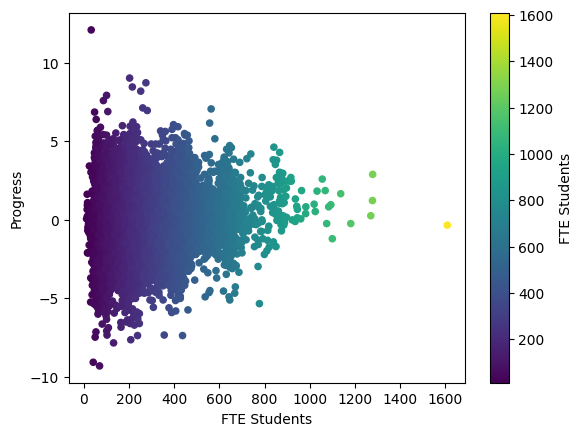

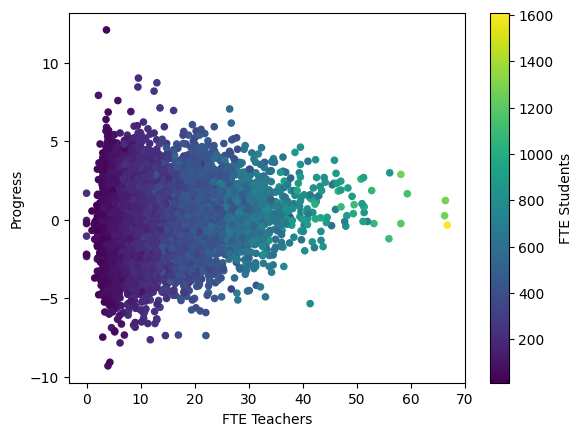

In [529]:
df.plot.scatter(x='FTE Students', y='Progress', c='FTE Students')
df.plot.scatter(x='FTE Teachers', y='Progress', c='FTE Students')


<Axes: xlabel='FTE Students', ylabel='Total Expenditure vs FTE Students Ratio'>

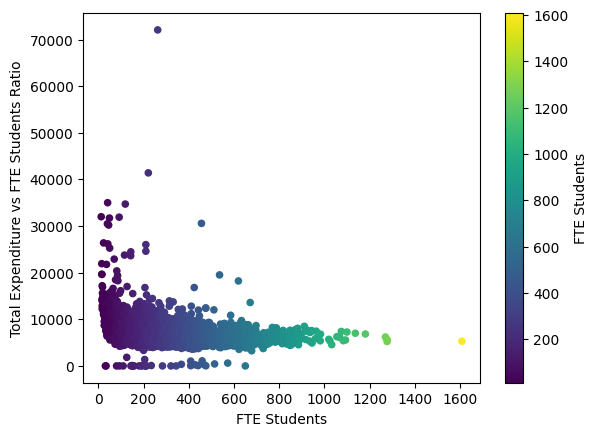

In [531]:
df.plot.scatter(x='FTE Students', y='Total Expenditure vs FTE Students Ratio', c='FTE Students')